# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

* Nama: Haifa Syabina
* Email: haifasyabina.coll@gmail.com
* Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import plotly.express as px
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import joblib
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
pd.set_option("display.max_columns", 80)
pd.set_option('display.max_rows', None)

### Menyiapkan data yang akan digunakan

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv',
                 sep=';')

df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Lihat tipe data, jumlah baris dan kolom dari setiap fitur yang ada. Dari kode tersebut kita bisa melihat bahwa:
* Terdapat 37 kolom dan 4424 baris.
* Hampir keselutuhan tipe data berbentuk numerik dengan tipe data int64 dan float64, hanya satu fitur yang bertipe data object yaitu Status mahasiswa.

In [6]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [ ]:
df.duplicated().sum()

np.int64(0)

Cek missing value dan juga nilai duplikat pada dataset. Pada dataset tersebut, data bersih dari nilai duplikat dan missing value.

In [ ]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Selanjutnya mengecek nilai statistik fitur numerik. Dari kode tersebut kita bisa melihat nilai rata-rata, max, min, standar deviasi, dan jumlah data.

### EDA

In [7]:
categorical_col = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Fathers_occupation', 'Mothers_occupation', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

Pisahkan kolom kategorikal dan cek nilai unique pada setiap kolom kategorikal

In [5]:
print("Unique values in categorical columns:")
for col in df[categorical_col].columns:
  print(f"{col}: {df[col].unique()}")

Unique values in categorical columns:
Marital_status: [1 2 4 3 5 6]
Application_mode: [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Course: [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Daytime_evening_attendance: [1 0]
Previous_qualification: [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Nacionality: [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
Mothers_qualification: [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]
Fathers_qualification: [12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41 22 13 29 43
 18 42 10  6 30 25 44 33 27 31]
Fathers_occupation: [  9   3   7  10   5   8   4   1   2 124   6   0  90 175 121  99 144 195
 192 161 193 151 182 132 131 194 163 135 143 171 103 172 152 183 122 102
 181 134 123 112 153 174 141 114 101 154]
Mothers_occupation: [  5   3   9   7   4   1 125   0   6   2  90   8 141 175  99 191 151 194
 192 132 

Selanjutnya, kita akan melakukan eksplorasi lebih lanjut. Karena dataset ini berbentuk numerik pada data yang seharusnya kategorikal, maka kita akan melakukan decoding terhadap data yang seharusnya kategorikal. Berikut kode yang akan digunakan untuk melakukan decoding

In [31]:
df_explore = df.copy()

In [32]:
df_explore['Marital_status'] = df_explore['Marital_status'].map({
    1:"single", 2:"married", 3:"widower", 4:"divorced", 5:"facto union", 6:"legally separated"
})

In [33]:
df_explore['Application_mode'] = df_explore['Application_mode'].map({
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
})

In [34]:
df_explore['Course'] = df_explore['Course'].map({
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
})

In [35]:
df_explore["Daytime_evening_attendance"] = df_explore["Daytime_evening_attendance"].map({
    1: "Daytime", 0: "Evening"
    })

In [36]:
df_explore['Previous_qualification'] = df_explore['Previous_qualification'].map({
    1: "Secondary education",
    2: "Higher education bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
})

In [37]:
df_explore['Nacionality'] = df_explore['Nacionality'].map({
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
    105: "Russian",
    108: "Cuban",
    109: "Colombian"
})

In [38]:
df_explore['Mothers_qualification'] = df_explore['Mothers_qualification'].map({
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-professional course",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
})

df_explore['Fathers_qualification'] = df_explore['Fathers_qualification'].map({
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
})

In [39]:
df_explore['Mothers_occupation'] = df_explore['Mothers_occupation'].map({
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "Unknown",
    122: "Health professionals",
    123: "teachers",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    171: "Skilled construction workers and the like, except electricians",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    191: "cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants"
})

df_explore['Fathers_occupation'] = df_explore['Fathers_occupation'].map({
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "Unknown",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "personal service workers",
    152: "sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
})

In [40]:
df_explore['Gender'] = df_explore['Gender'].map({1: "male", 0: "female"})
df_explore['Displaced'] = df_explore['Displaced'].map({1: "yes", 0: 'no'})
df_explore['Educational_special_needs'] = df_explore['Educational_special_needs'].map({1: "yes", 0: 'no'})
df_explore['Debtor'] = df_explore['Debtor'].map({1: "yes", 0: 'no'})
df_explore['Tuition_fees_up_to_date'] = df_explore['Tuition_fees_up_to_date'].map({1: "yes", 0: 'no'})
df_explore['Scholarship_holder'] = df_explore['Scholarship_holder'].map({1: "yes", 0: 'no'})
df_explore['International'] = df_explore['International'].map({1: "yes", 0: 'no'})

In [41]:
df_explore.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,yes,no,no,yes,male,no,20,no,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,yes,no,no,no,male,no,19,no,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,124.8,yes,no,no,no,male,no,19,no,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,yes,no,no,yes,female,no,20,no,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,no,no,no,yes,female,no,45,no,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Setelah data kategorik sudah di decoding, kita akan melihat distribusi data pada data kategorik dengan code berikut.

In [42]:
df_explore.select_dtypes(include=np.number).columns

Index(['Application_order', 'Previous_qualification_grade', 'Admission_grade',
       'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP'],
      dtype='object')

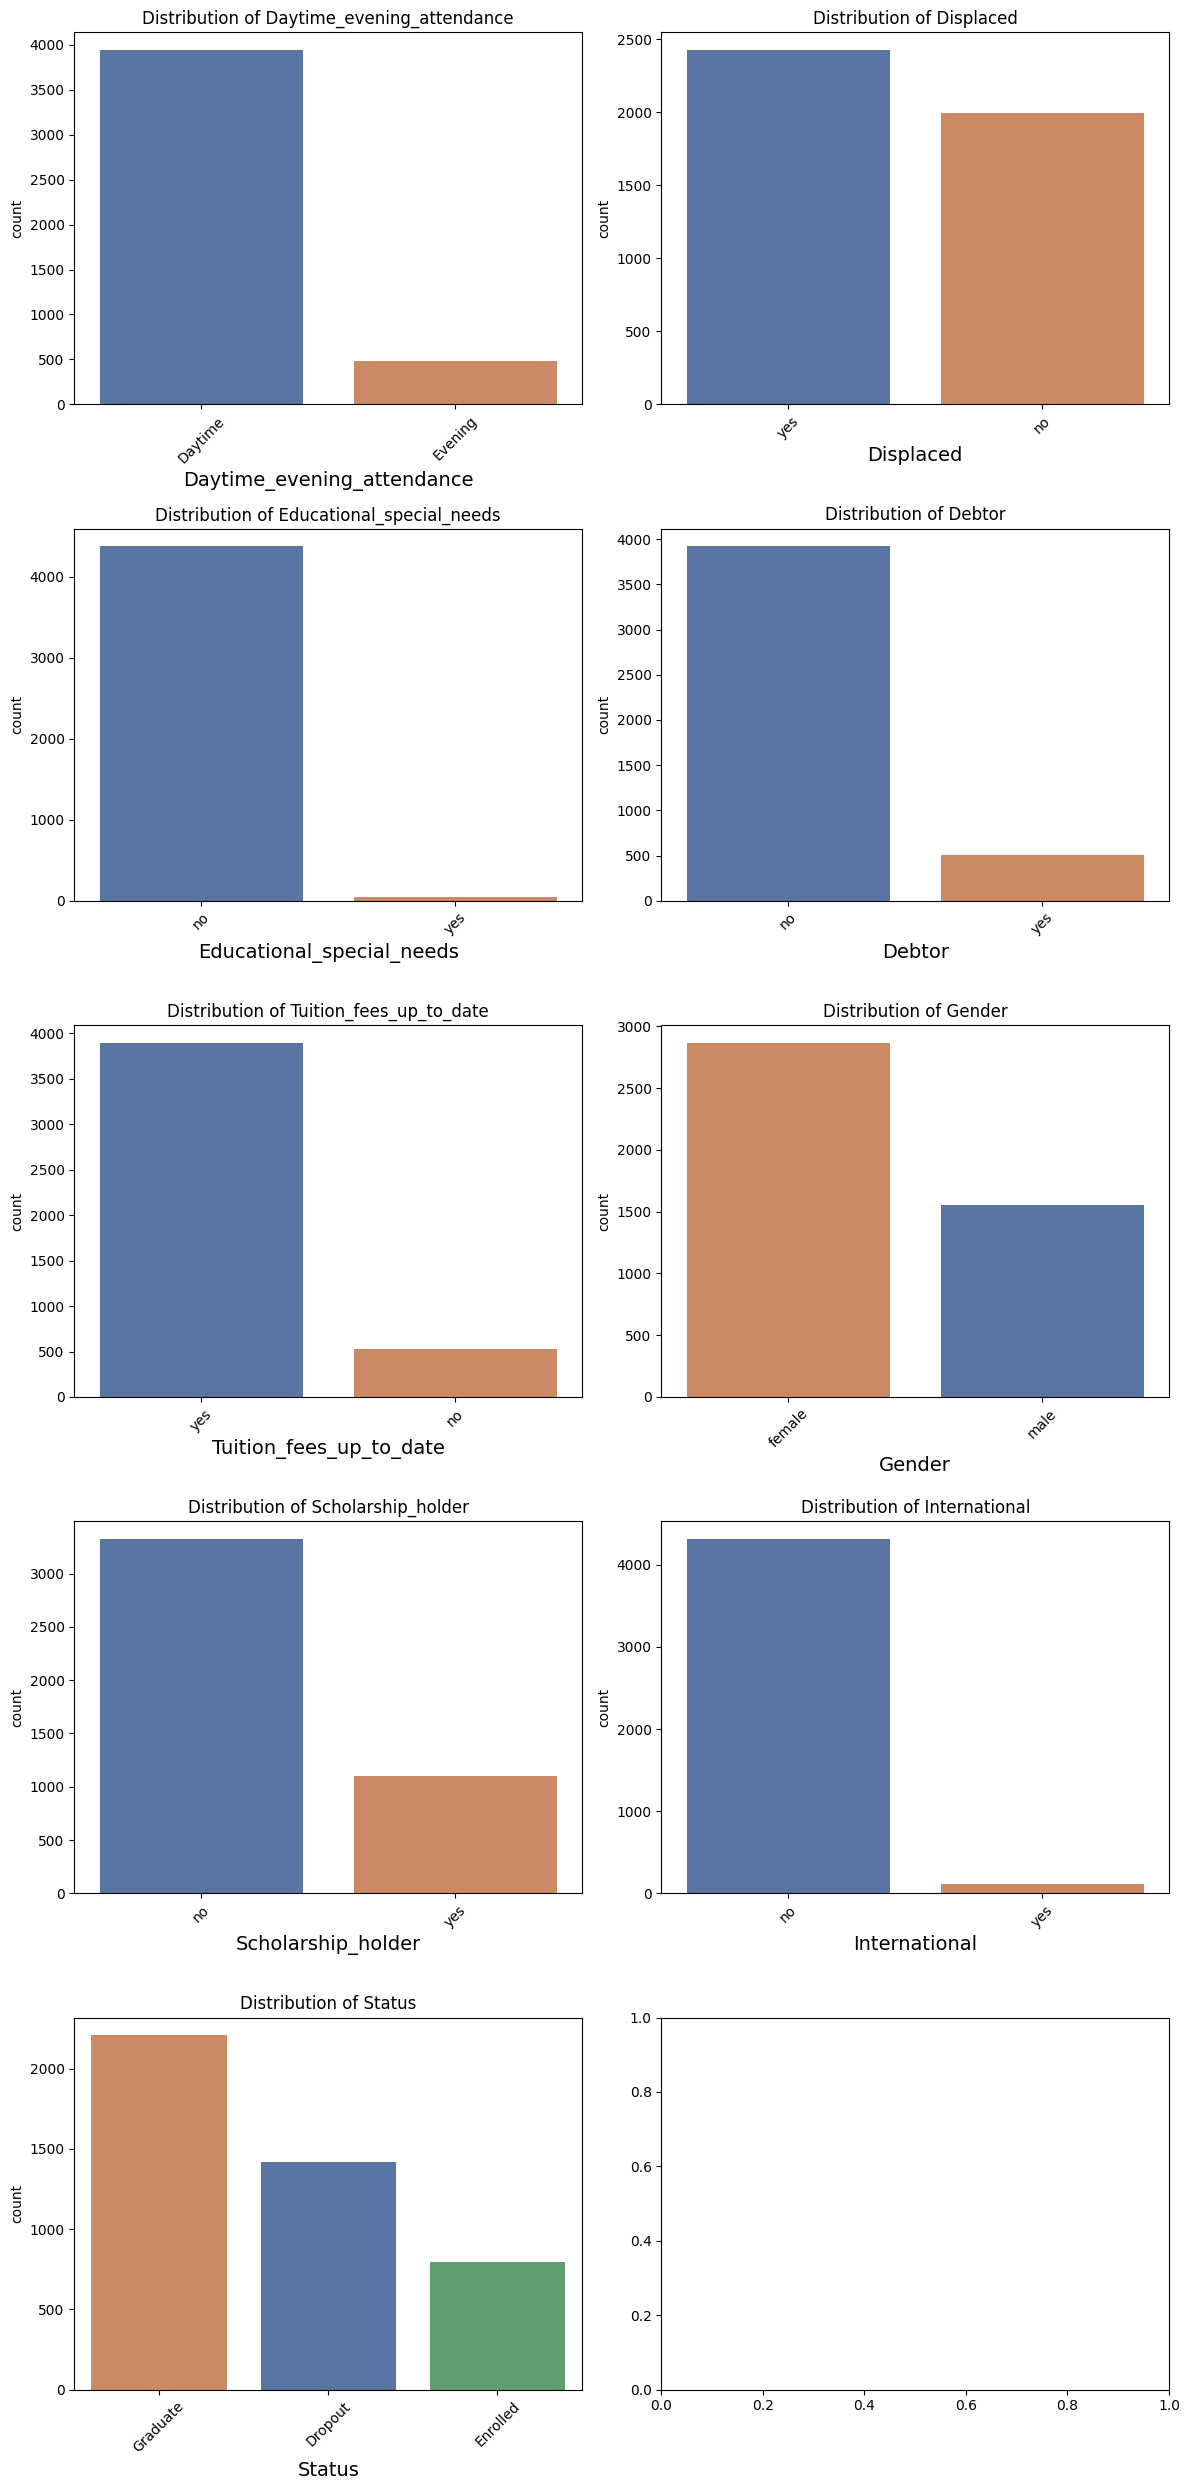

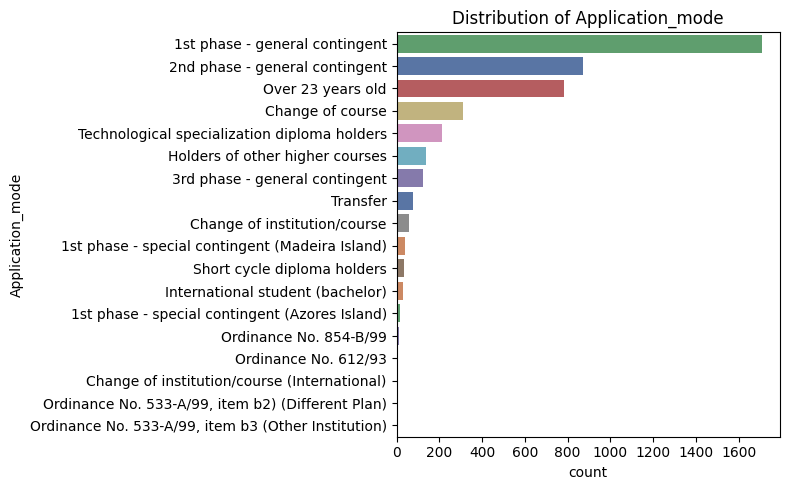

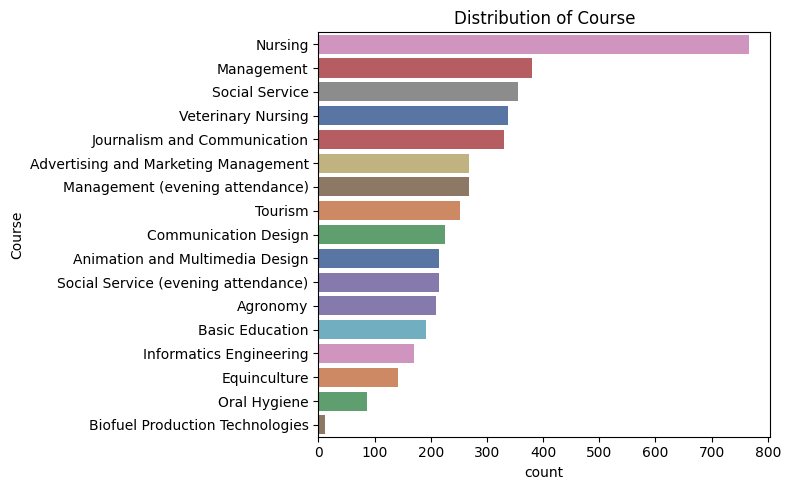

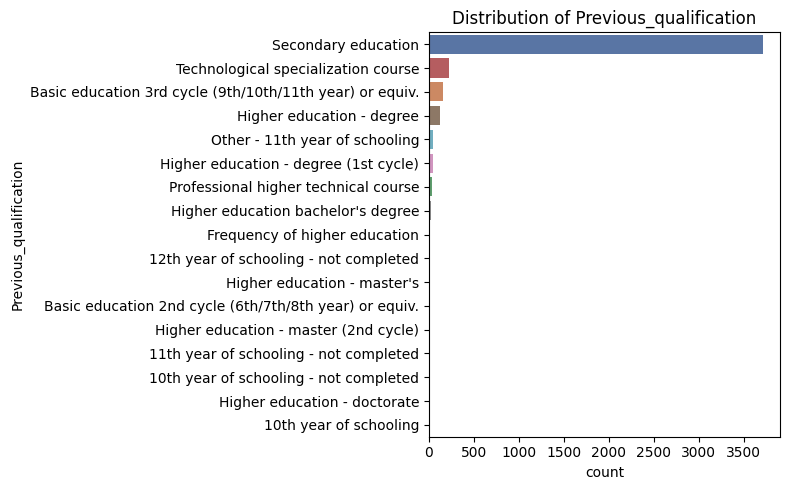

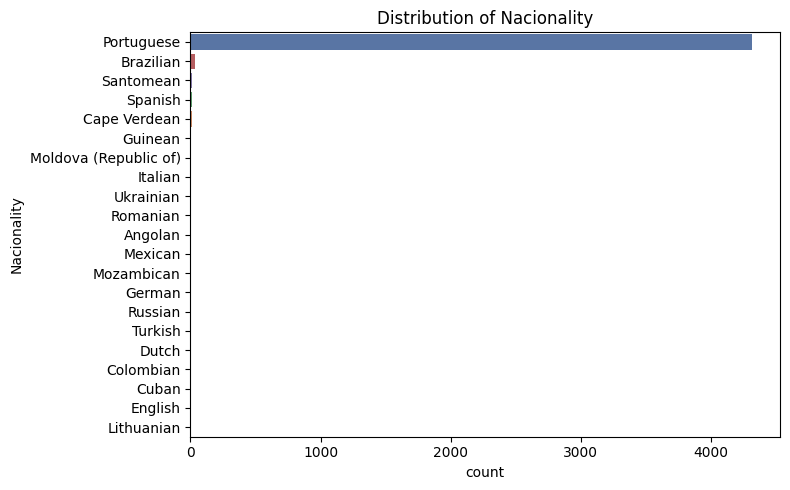

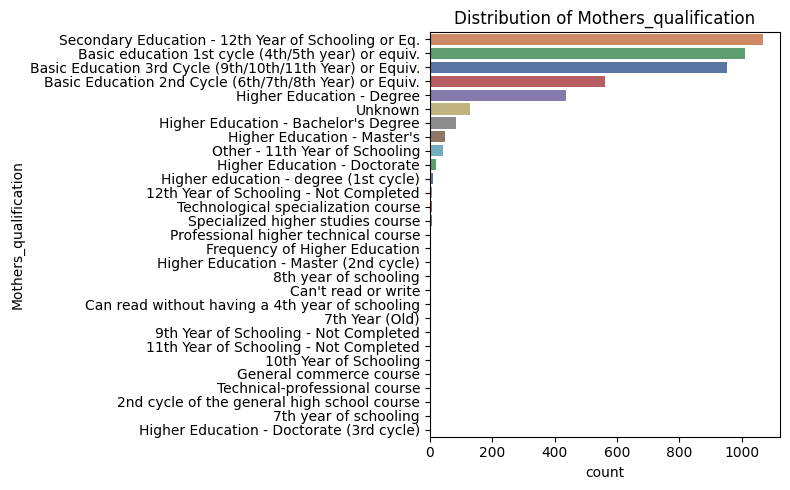

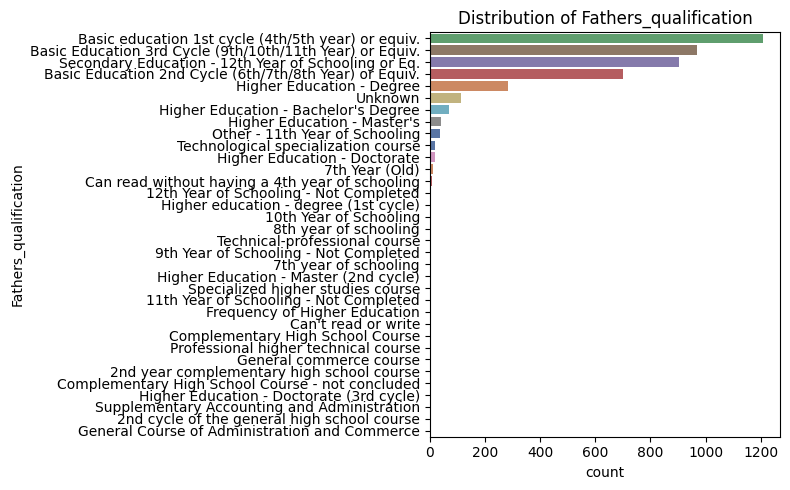

C:\Users\Asus\AppData\Local\Temp\ipykernel_20868\3356171473.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


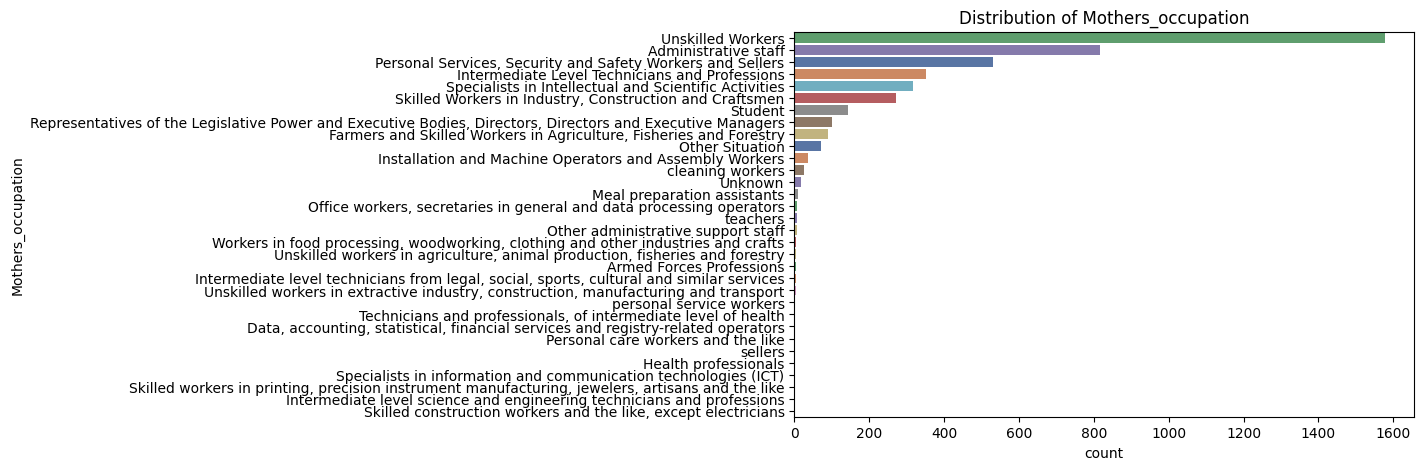

C:\Users\Asus\AppData\Local\Temp\ipykernel_20868\3356171473.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


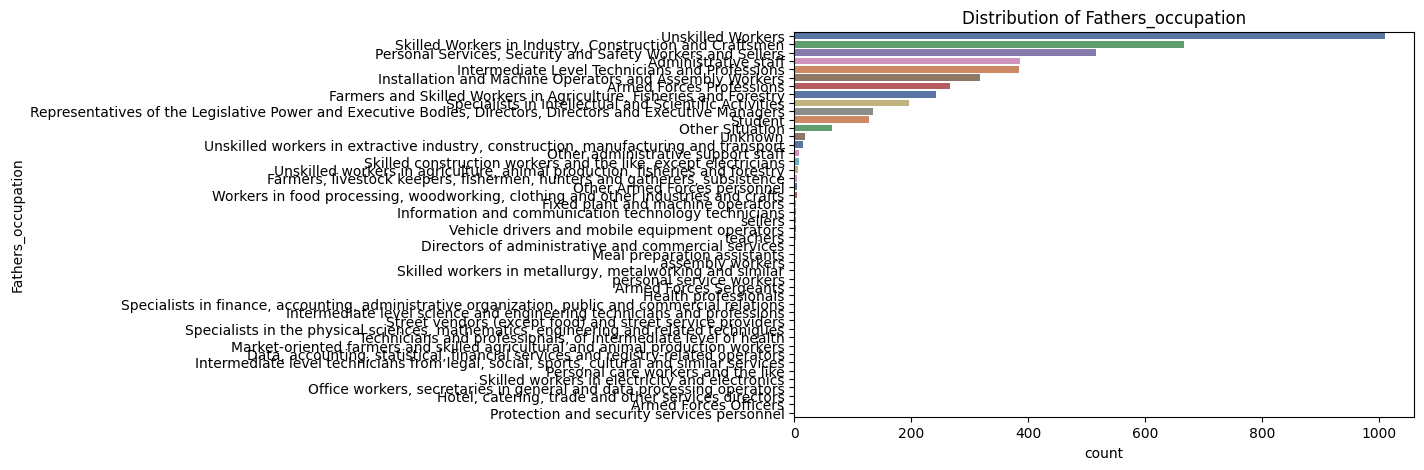

In [43]:
categorical_col = df_explore.select_dtypes(include='object').columns

def plot_histogram(df, categorical_columns):
  # Pisahkan kolom <6 dan >10
  less_6 = [col for col in categorical_columns if df[col].nunique() < 6]
  more_10 = [col for col in categorical_columns if df[col].nunique() > 10]

  if less_6:
    n_cols = 2
    n_rows = math.ceil(len(less_6) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
    axes = axes.flatten()

    for i, col in enumerate(less_6):
      sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=df[col], ax=axes[i], palette='deep')
      axes[i].set_title(f'Distribution of {col}')
      axes[i].tick_params(axis='x', rotation=45)
      axes[i].set_xlabel(col, fontsize=14)
      # axes[i].set_ylabel(df[col], fontsize=12)

    plt.tight_layout()
    plt.show()

  for col in more_10:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, hue=df[col], palette='deep')
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


plot_histogram(df_explore, categorical_col)

Yang perlu di highlight pada eksplorasi data ini bahwa fitur status terlihat ketidakseimbangan data. Data yang tidak seimbang ini mungkin akan terjadi bias pada model yang akan kita buat.

Selain itu, banyak ketidakseimbangan data pada beberapa fitur.

In [44]:
object_df = pd.DataFrame(df_explore[categorical_col].melt(var_name='column', value_name='value')
.value_counts()).rename(columns={0:'count'}).sort_values(by=['column', 'count'])
display(object_df)

count
column                     value                                                    
Application_mode           Ordinance No. 533-A/99, item b3 (Other Institut...      1
                           Change of institution/course (International)            1
                           Ordinance No. 533-A/99, item b2) (Different Plan)       1
                           Ordinance No. 612/93                                    3
                           Ordinance No. 854-B/99                                 10
                           1st phase - special contingent (Azores Island)         16
                           International student (bachelor)                       30
                           Short cycle diploma holders                            35
                           1st phase - special contingent (Madeira Island)        38
                           Change of institution/course                           59
                           Transfer                                               77
                           3rd phase - general contingent                        124
                           Holders of other higher courses                       139
                           Technological specialization diploma holders          213
                           Change of course                                      312
                           Over 23 years old                                     785
                           2nd phase - general contingent                        872
                           1st phase - general contingent                       1708
Course                     Biofuel Production Technologies                        12
                           Oral Hygiene                                           86
                           Equinculture                                          141
                           Informatics Engineering                               170
                           Basic Education                                       192
                           Agronomy                                              210
                           Animation and Multimedia Design                       215
                           Social Service (evening attendance)                   215
                           Communication Design                                  226
                           Tourism                                               252
                           Management (evening attendance)                       268
                           Advertising and Marketing Management                  268
                           Journalism and Communication                          331
                           Veterinary Nursing                                    337
                           Social Service                                        355
                           Management                                            380
                           Nursing                                               766
Daytime_evening_attendance Evening                                               483
                           Daytime                                              3941
Debtor                     yes                                                   503
                           no                                                   3921
Displaced                  no                                                   1998
                           yes                                                  2426
Educational_special_needs  yes                                                    51
                           no                                                   4373
Fathers_occupation         Data, accounting, statistical, financial servic...      1
                           Hotel, catering, trade and other services direc...      1
                           Market-oriented farmers and skilled agricultura...      1

In [45]:
def merge_status(status):
  if status in ['Ordinance No. 533-A/99, item b3 (Other Institution)',
                'Ordinance No. 533-A/99, item b2) (Different Plan)',
                'Ordinance No. 612/93',
                'Ordinance No. 854-B/99']:
                return 'Ordinance'
  elif status in ["Change of institution/course (International)"]:
    return 'Change of institution/course'
  elif status in ['1st phase - special contingent (Azores Island)', '1st phase - special contingent (Madeira Island)']:
    return '1st phase - special contingent'
  return status

df_explore['Application_mode'] = df_explore['Application_mode'].apply(merge_status)

In [46]:
# df_explore['Application_mode'] = df['Application_mode'].replace({
#     'Ordinance No. 533-A/99, item b3 (Other Institution)': 'Ordinance',
#     'Ordinance No. 533-A/99, item b2) (Different Plan)': 'Ordinance',
#     'Ordinance No. 612/93': "Ordinance",
#     'Ordinance No. 854-B/99': "Ordinance",
#     'Change of institution/course (International)': 'Change of institution/course',
#     '1st phase - special contingent (Azores Island)': '1st phase - special contingent',
#     '1st phase - special contingent (Madeira Island)': '1st phase - special contingent'
# })

df_explore['Fathers_occupation'] = df_explore['Fathers_occupation'].replace({
    "Data, accounting, statistical, financial services and registry-related operators" : "Other Situation",
    "Hotel, catering, trade and other services directors" : "Other Situation",
    "Market-oriented farmers and skilled agricultural and animal production workers" : "Other Situation",
    "Armed Forces Officers" : "Other Situation",
    "Specialists in finance, accounting, administrative organization, public and commercial relations" : "Other Situation",
    "Specialists in the physical sciences, mathematics, engineering and related techniques" : "Other Situation",
    "Street vendors (except food) and street service providers" : "Other Situation",
    "Technicians and professionals, of intermediate level of health" : "Other Situation",
    "Intermediate level science and engineering technicians and professions" : "Other Situation",
    "Intermediate level technicians from legal, social, sports, cultural and similar services" : "Other Situation",
    "Office workers, secretaries in general and data processing operators" : "Other Situation",
    "Personal care workers and the like" : "Other Situation",
    "Protection and security services personnel" : "Other Situation",
    "Skilled workers in electricity and electronics" : "Other Situation",
    "Armed Forces Sergeants" : "Other Situation",
    "Health professionals" : "Other Situation",
    "Skilled workers in metallurgy, metalworking and similar" : "Other Situation",
    "Directors of administrative and commercial services" : "Other Situation",
    "personal service workers" : "Other Situation",
    "assembly workers" : "Other Situation",
    "Meal preparation assistants" : "Other Situation",
    "Fixed plant and machine operators" : "Other Situation",
    "teachers" : "Other Situation",
    "Vehicle drivers and mobile equipment operators" : "Other Situation",
    "sellers" : "Other Situation",
    "Information and communication technology technicians" : "Other Situation",
    "Other Armed Forces personnel" : "Other Situation",
    "Workers in food processing, woodworking, clothing and other industries and crafts" : "Other Situation",
    "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence": "Other Siuation",
    "Unskilled workers in agriculture, animal production, fisheries and forestry": "Other Situation",
    "Skilled construction workers and the like, except electricians": "Other Situation",
    "Other administrative support staff": "Other Situation",
    "Unskilled workers in extractive industry, construction, manufacturing and transport" : "Other Situation",
    "Unknown": "Other Situation",
    "Other Siuation": "Other Situation"
})

df_explore['Fathers_qualification'] = df_explore['Fathers_qualification'].replace({
    "General commerce course": "course",
    "Complementary High School Course": "course",
    "Complementary High School Course - not concluded": "course",
    "General Course of Administration and Commerce": "course",
    "2nd cycle of the general high school course": "course",
    "2nd year complementary high school course": "course",
    "Supplementary Accounting and Administration": "course",
    "Professional higher technical course": "course",
    "Higher Education - Doctorate (3rd cycle)": "Higher Education - Doctorate",
    "Can't read or write": "Unknown",
    "Specialized higher studies course": "course",
    "Higher Education - Master (2nd cycle)": "Higher Education - Master's",
    "Frequency of Higher Education": "Higher Education - Degree",
    "11th Year of Schooling - Not Completed": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    "7th year of schooling": "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    "9th Year of Schooling - Not Completed": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    "Technical-professional course": "course",
    "10th Year of Schooling": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    "8th year of schooling": "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    "Higher education - degree (1st cycle)" : "Higher Education - Degree",
    "12th Year of Schooling - Not Completed": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    "Can read without having a 4th year of schooling": "Unknown"
    })

df_explore['Marital_status'] = df_explore['Marital_status'].replace({
    "widower": "divorced",
    "legally separated": "divorced"
})

df_explore['Mothers_occupation'] = df_explore['Mothers_occupation'].replace({
    "Intermediate level science and engineering technicians and professions": "Other Situation",
    "Specialists in information and communication technologies (ICT)": "Other Situation",
    "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like": "Other Situation",
    "Skilled construction workers and the like, except electricians": "Other Situation",
    "Personal care workers and the like": "Other Situation",
    "sellers": "Other Situation",
    "Health professionals": "Other Situation",
    "Data, accounting, statistical, financial services and registry-related operators": "Other Situation",
    "Technicians and professionals, of intermediate level of health": "Other Situation",
    "personal service workers": "Other Situation",
    "Unskilled workers in extractive industry, construction, manufacturing and transport": "Other Situation",
    "Intermediate level technicians from legal, social, sports, cultural and similar services": "Other Situation",
    "Armed Forces Professions": "Other Situation",
    "Unskilled workers in agriculture, animal production, fisheries and forestry": "Other Situation",
    "Workers in food processing, woodworking, clothing and other industries and crafts": "Other Situation",
    "Other administrative support staff": "Other Situation",
    "teachers": "Other Situation",
    "Office workers, secretaries in general and data processing operators": "Other Situation",
    "Meal preparation assistants": "Other Situation",
    "cleaning workers": "Other Situation",
    "Installation and Machine Operators and Assembly Workers": "Other Situation"
})

df_explore['Mothers_qualification'] = df_explore['Mothers_qualification'].replace({
    "General commerce course": "course",
    "Complementary High School Course": "course",
    "Complementary High School Course - not concluded": "course",
    "General Course of Administration and Commerce": "course",
    "2nd cycle of the general high school course": "course",
    "2nd year complementary high school course": "course",
    "Supplementary Accounting and Administration": "course",
    "Professional higher technical course": "course",
    "Higher Education - Doctorate (3rd cycle)": "Higher Education - Doctorate",
    "Can't read or write": "Unknown",
    "Specialized higher studies course": "course",
    "Higher Education - Master (2nd cycle)": "Higher Education - Master's",
    "Frequency of Higher Education": "Higher Education - Degree",
    "11th Year of Schooling - Not Completed": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    "7th year of schooling": "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    "9th Year of Schooling - Not Completed": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    "Technical-professional course": "course",
    "10th Year of Schooling": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    "8th year of schooling": "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    "Higher education - degree (1st cycle)" : "Higher Education - Degree",
    "12th Year of Schooling - Not Completed": "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    "Can read without having a 4th year of schooling": "Unknown"
})

df_explore['Nacionality'] = df_explore['Nacionality'].replace({
    "Lithuanian": "Others",
    "Dutch": "Others",
    "English": "Others",
    "Cuban": "Others",
    "Colombian": "Others",
    "Turkish": "Others",
    "Angolan": "Others",
    "Romanian": "Others",
    "Russian": "Others",
    "Mozambican": "Others",
    "German": "Others",
    "Mexican": "Others",
    "Ukrainian": "Others",
    "Moldova (Republic of)": "Others",
    "Italian": "Others",
    "Guinean": "Others",
    "Cape Verdean" : "Others",
    "Spanish"	: "Others",
    "Santomean"	: "Others",
    "Brazilian" : "Others"
})

df_explore['Previous_qualification'] = df_explore['Previous_qualification'].replace({
    "10th year of schooling":"Other - 11th year of schooling",
    "Higher education - doctorate":"Frequency of higher education",
    "10th year of schooling - not completed":"Not Completed",
    "11th year of schooling - not completed":"Not Completed",
    "Higher education - master (2nd cycle)":"Frequency of higher education",
    "Basic education 2nd cycle (6th/7th/8th year) or equiv":"Not Completed",
    "12th year of schooling - not completed": "Not Completed"
})

Lakukan pengecekan kembali

In [47]:
object_df = pd.DataFrame(df_explore[categorical_col].melt(var_name='column', value_name='value')
.value_counts()).rename(columns={0:'count'}).sort_values(by=['column', 'count'])
display(object_df)

count
column                     value                                                    
Application_mode           Ordinance                                              15
                           International student (bachelor)                       30
                           Short cycle diploma holders                            35
                           1st phase - special contingent                         54
                           Change of institution/course                           60
                           Transfer                                               77
                           3rd phase - general contingent                        124
                           Holders of other higher courses                       139
                           Technological specialization diploma holders          213
                           Change of course                                      312
                           Over 23 years old                                     785
                           2nd phase - general contingent                        872
                           1st phase - general contingent                       1708
Course                     Biofuel Production Technologies                        12
                           Oral Hygiene                                           86
                           Equinculture                                          141
                           Informatics Engineering                               170
                           Basic Education                                       192
                           Agronomy                                              210
                           Social Service (evening attendance)                   215
                           Animation and Multimedia Design                       215
                           Communication Design                                  226
                           Tourism                                               252
                           Advertising and Marketing Management                  268
                           Management (evening attendance)                       268
                           Journalism and Communication                          331
                           Veterinary Nursing                                    337
                           Social Service                                        355
                           Management                                            380
                           Nursing                                               766
Daytime_evening_attendance Evening                                               483
                           Daytime                                              3941
Debtor                     yes                                                   503
                           no                                                   3921
Displaced                  no                                                   1998
                           yes                                                  2426
Educational_special_needs  yes                                                    51
                           no                                                   4373
Fathers_occupation         Other Siuation                                          5
                           Student                                               128
                           Representatives of the Legislative Power and Ex...    134
                           Other Situation                                       172
                           Specialists in Intellectual and Scientific Acti...    197
                           Farmers and Skilled Workers in Agriculture, Fis...    242
                           Armed Forces Professions                              266
                           Installation and Machine Operators and Assembly...    318

In [48]:
df_explore.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


<function matplotlib.pyplot.show(close=None, block=None)>

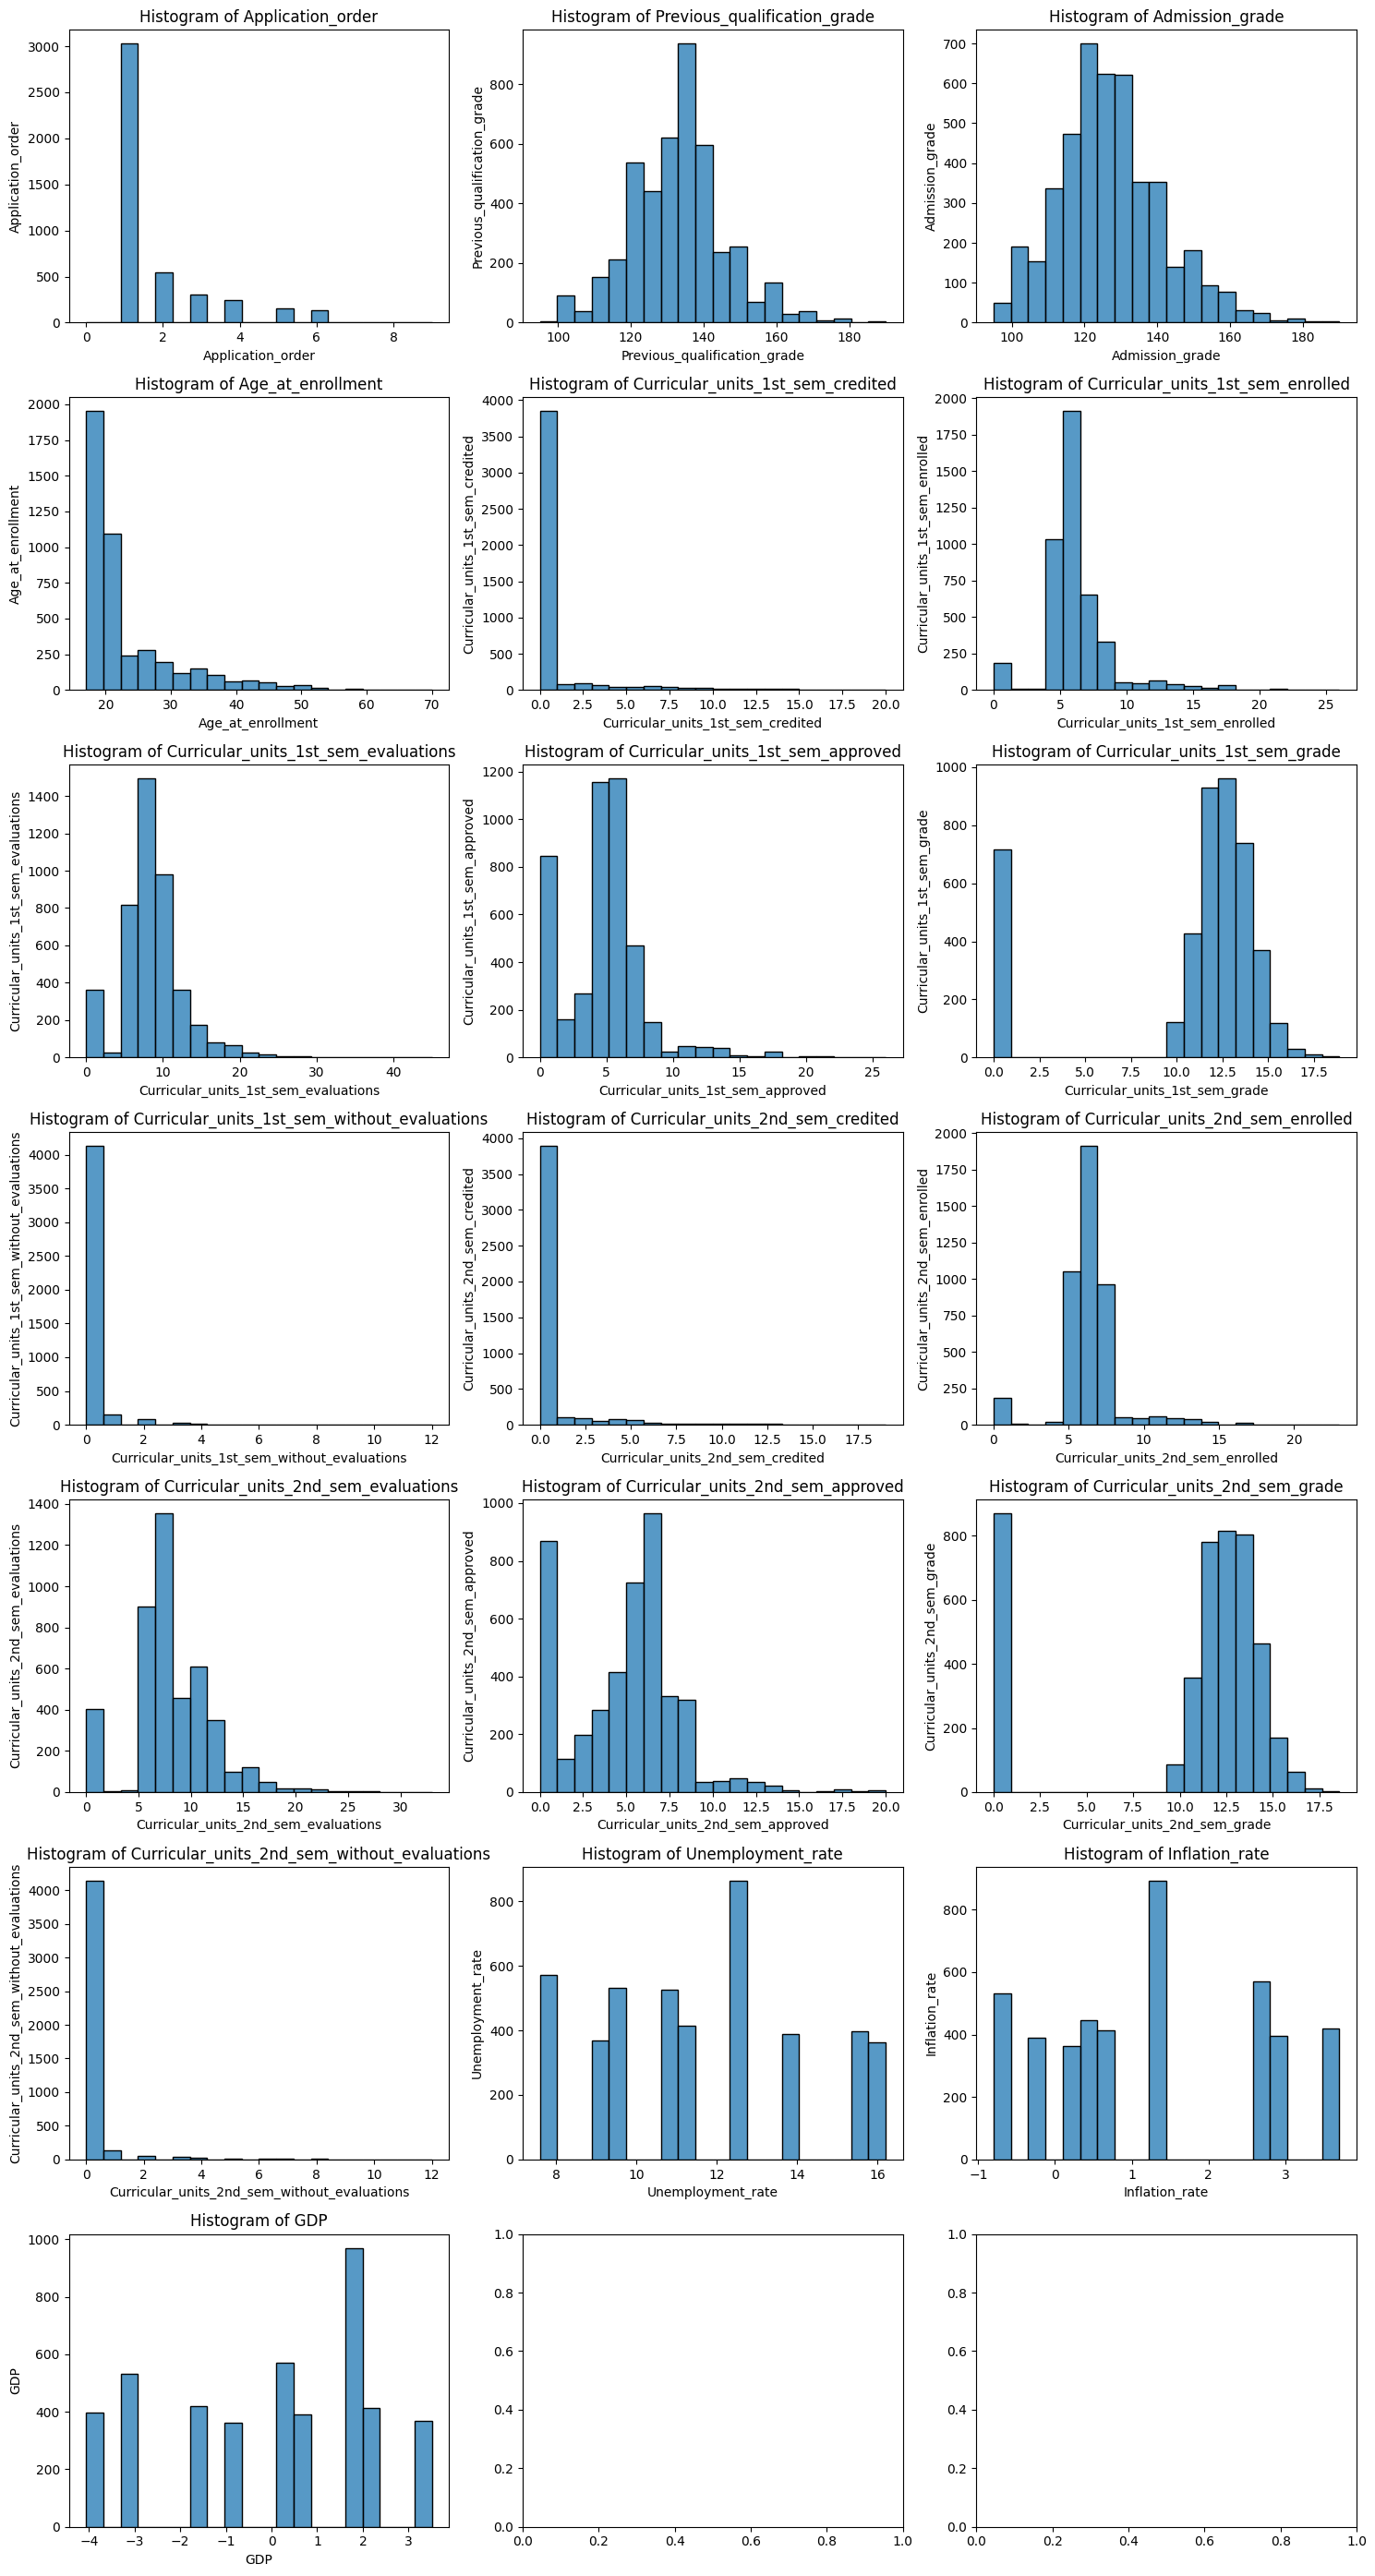

In [50]:
numerical_cols = df_explore.select_dtypes(include=['int64', 'float64']).columns

n_cols = 3
n_rows = math.ceil(len(numerical_cols)/ n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
  sns.histplot(data=df, x=col, ax=axes[i], bins=20)
  axes[i].set_title(f"Histogram of {col}")
  axes[i].set_ylabel(col)

plt.tight_layout()
plt.show

Code di atas digunakan untuk melihat sebaran data pada data numerik.

Pada langkah selanjutnya kita akan melihat korelasi antar fitur. Pertama kita harus mengubah semua fitur agar menjadi fitur numerik.

In [51]:
numerical_cols

Index(['Application_order', 'Previous_qualification_grade', 'Admission_grade',
       'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
       'Inflation_rate', 'GDP'],
      dtype='object')

In [53]:
df_explore.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,yes,no,no,yes,male,no,20,no,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,yes,no,no,no,male,no,19,no,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,124.8,yes,no,no,no,male,no,19,no,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,yes,no,no,yes,female,no,20,no,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,no,no,no,yes,female,no,45,no,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [54]:
df_explore['Status'] = df_explore['Status'].map({
    'Dropout': 0, 'Graduate': 1, 'Enrolled': 2
})

In [ ]:
df_explore.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,Basic Education 3rd Cycle (9th/10th/11th Year)...,Unskilled Workers,127.3,yes,no,no,yes,male,no,20,no,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Secondary Education - 12th Year of Schooling o...,Intermediate Level Technicians and Professions,142.5,yes,no,no,no,male,no,19,no,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,124.8,yes,no,no,no,male,no,19,no,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Intermediate Level Technicians and Professions,119.6,yes,no,no,yes,female,no,20,no,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,141.5,no,no,no,yes,female,no,45,no,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [55]:
encode = LabelEncoder()
df_encoded = df_explore.copy()
for col in categorical_col:
  le = LabelEncoder()
  df_encoded[col] = le.fit_transform(df_encoded[col])

In [30]:
df_encoded.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,3,2,5,2,0,10,122.0,1,2,8,4,12,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,3,7,1,15,0,10,160.0,1,9,5,2,4,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,3,0,5,5,0,10,122.0,1,3,3,10,12,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,3,2,2,8,0,10,122.0,1,1,3,4,4,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,9,1,14,1,10,100.0,1,3,1,10,12,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [31]:
corr = df_encoded.corr()

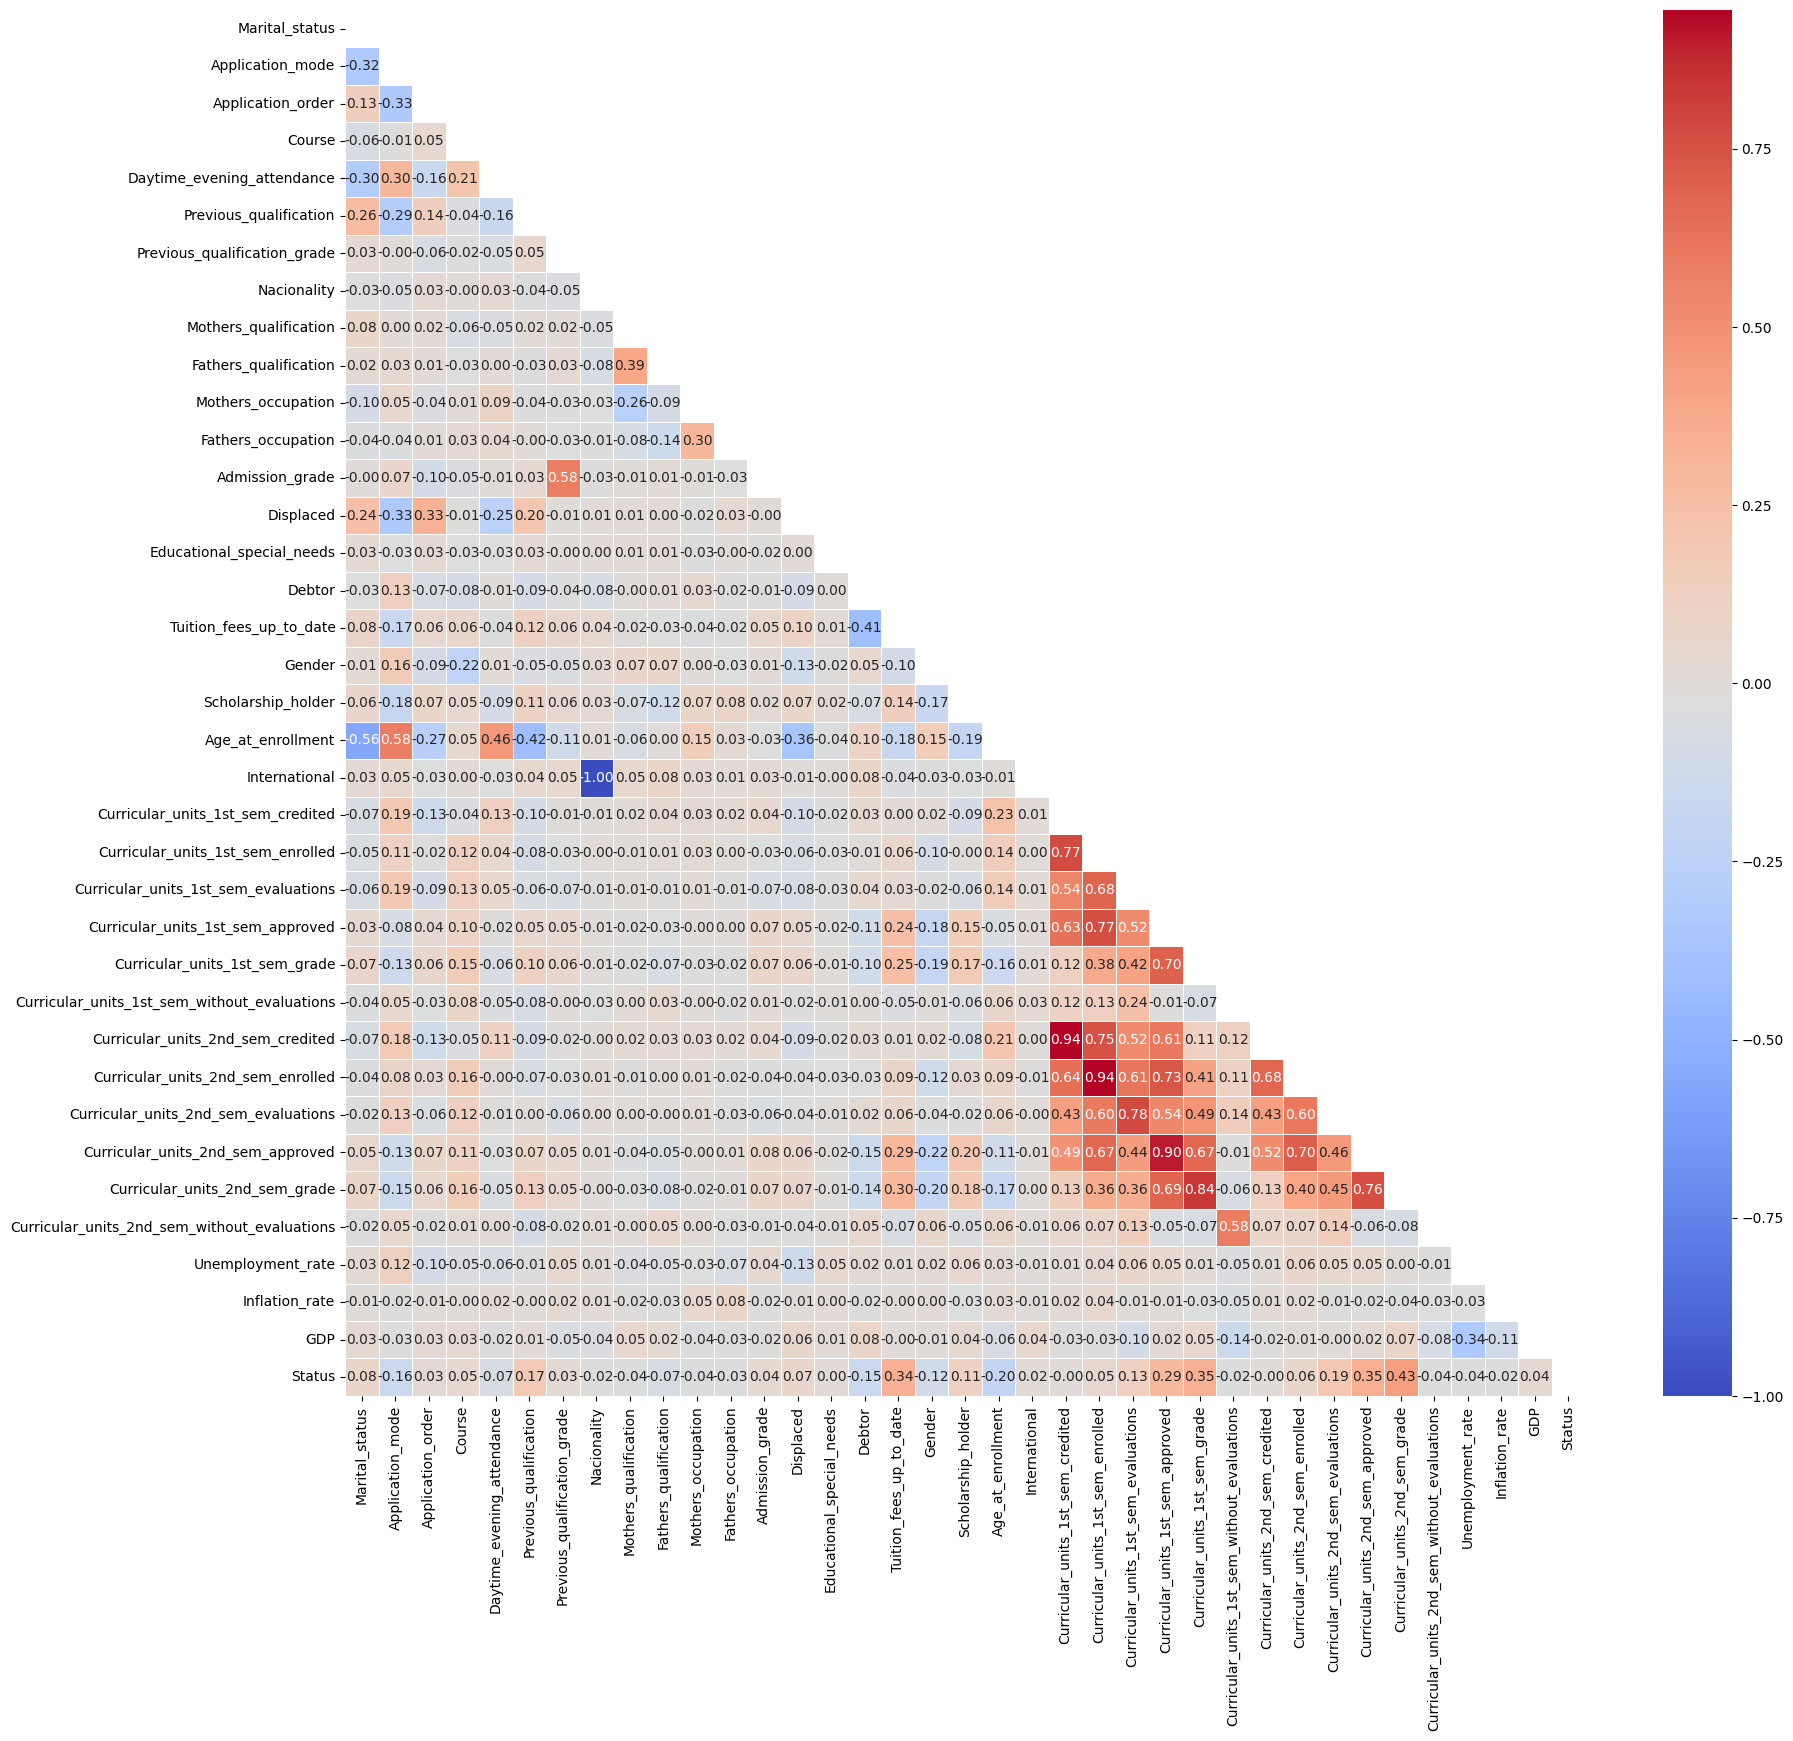

In [32]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 18))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

Pada heatmap di atas, terdapat beberapa fitur yang memiliki korelasi yang tinggi, namun ada juga fitur yang memiliki korelasi di bawah 0.01.

## Data Preparation / Preprocessing

Selanjutnya kita akan melakukan data preparation untuk melakukan modeling. Karena pada fitur target hanya membutuhkan mahasiswa yang dropout dan graduation, maka status yang Enrolled akan kita buang.

In [56]:
df_encoded.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,3,2,5,2,0,10,122.0,1,2,8,4,12,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,3,7,1,15,0,10,160.0,1,9,5,2,4,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,3,0,5,5,0,10,122.0,1,3,3,10,12,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,3,2,2,8,0,10,122.0,1,1,3,4,4,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,9,1,14,1,10,100.0,1,3,1,10,12,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [57]:
df_proses = df_encoded.copy()

In [58]:
df_proses = df_proses[~(df_proses.Status==2)]

In [59]:
df_proses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                3630 non-null   int64  
 1   Application_mode                              3630 non-null   int64  
 2   Application_order                             3630 non-null   int64  
 3   Course                                        3630 non-null   int64  
 4   Daytime_evening_attendance                    3630 non-null   int64  
 5   Previous_qualification                        3630 non-null   int64  
 6   Previous_qualification_grade                  3630 non-null   float64
 7   Nacionality                                   3630 non-null   int64  
 8   Mothers_qualification                         3630 non-null   int64  
 9   Fathers_qualification                         3630 non-null   int64 

In [60]:
print("Unique values in categorical columns:")
for col in df_proses.columns:
  print(f"{col}: {df_proses[col].unique()}")

Unique values in categorical columns:
Marital_status: [3 2 0 1]
Application_mode: [ 2  7  0  9  3 10  5  4 11  6 12  1  8]
Application_order: [5 1 2 4 3 6 0]
Course: [ 2 15  5  8 14 10 11 13  0  3 16  6  9  4  7  1 12]
Daytime_evening_attendance: [0 1]
Previous_qualification: [10  1  9  7 11  3  4  6  5  8  2  0]
Previous_qualification_grade: [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  125.  126.  115.  130.  140.  120.  103.  132.  167.
 129.  141.  150.  118.  106.  121.  114.  124.  123.  113.  111.  131.
 158.  148.  117.  153.  178.  116.  134.  128.  143.  155.  154.  146.
 151.  152.  145.  170.  112.  107.  156.  188.  161.  166.  147.   96.
 144.  102.  180.  105.  108.  165.  190.  162.  164.  163.  159.  117.4
 175.  133.8 176.  168.  139.3  97.  172.  101.  157.  140.8 184.4 148.9
 109.  174.  182.   99.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
Nacionality: [1 0]
Mothers_qualification: [ 2

#### Train-test split

In [61]:
train_df, test_df = train_test_split(df_proses, test_size=0.2, random_state=42)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print("Baris dan kolom sebelum undersampling", train_df.shape)
print("Baris dan kolom sebelum undersampling", test_df.shape)

Baris dan kolom sebelum undersampling (2904, 37)
Baris dan kolom sebelum undersampling (726, 37)


Membagi data untuk pelatihan dan pengujian. Data latih sebanyak 80% dan data uji sebanyak 20%. Kemudian kita akan mengecek distribusi fitur target.

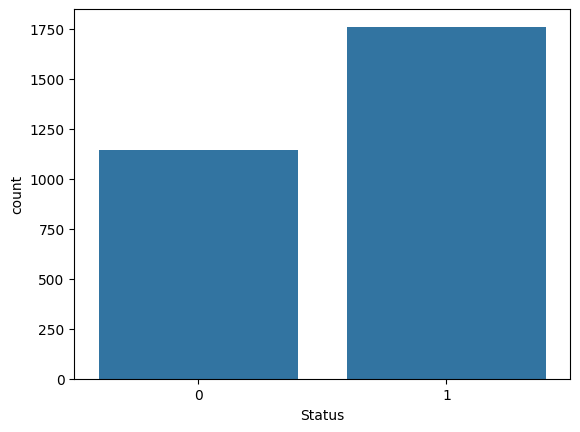

In [62]:
sns.countplot(data=train_df, x='Status')
plt.show()

Terdapat distribusi data yang tidak seimbang, kita akan melakukan oversampling untuk meratakan distribusi.

In [63]:
train_df.Status.value_counts()

Status
1    1760
0    1144
Name: count, dtype: int64

In [64]:
df_major = train_df[(train_df.Status == 1)]
df_minor = train_df[(train_df.Status == 0)]

Jumlah sample Graduate sebanyak 1760 dan Dropout sebanyak 1144. Kita akan menambahkan sample Dropout agar sama dengan sample Graduate.

In [65]:
df_minor_oversample = resample(df_minor, n_samples=1760, random_state=42)
print(df_minor_oversample.shape)

(1760, 37)


Kemudian lakukan penggabungan kembali seluruh data

In [66]:
oversample_train_df = pd.concat([df_major, df_minor_oversample]).reset_index(drop=True)
oversample_train_df = shuffle(oversample_train_df, random_state=42)
oversample_train_df.reset_index(drop=True, inplace=True)
oversample_train_df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
2705,3,0,1,12,0,10,135.0,1,3,1,6,12,125.8,0,0,0,1,0,1,20,0,0,7,14,7,10.642857,0,0,8,8,8,11.550000,0,12.7,3.7,-1.70,1
2544,3,2,1,11,0,10,130.0,1,2,9,10,9,130.4,1,0,0,1,0,1,19,0,0,7,7,7,13.894286,0,0,8,8,8,14.362500,0,11.1,0.6,2.02,1
2021,3,2,6,7,0,10,111.0,1,2,5,4,1,106.5,1,0,0,1,1,0,19,0,0,5,10,3,10.500000,0,0,5,11,3,10.800000,0,12.4,0.5,1.79,0
206,3,2,4,5,0,10,116.0,1,1,3,10,12,109.0,0,0,0,1,0,1,23,0,0,6,6,6,13.333333,0,0,6,8,3,12.666667,0,11.1,0.6,2.02,0
2051,3,0,1,2,0,10,141.0,1,9,1,0,3,136.8,1,0,0,1,0,1,18,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,13.9,-0.3,0.79,1


In [67]:
oversample_train_df['Application_mode'].unique()

array([12,  2,  0,  9,  4,  7,  6,  5,  3, 11,  8,  1, 10])

Lakukan pengecekan kembali

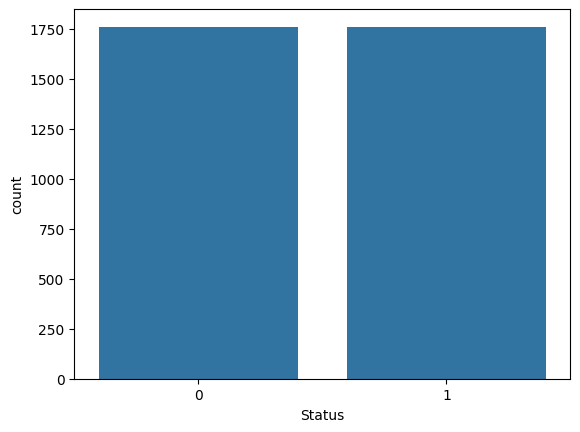

In [68]:
sns.countplot(data=oversample_train_df, x='Status')
plt.show()

#### Scaling

In [69]:
X_train = oversample_train_df.drop(columns='Status', axis=1)
y_train = oversample_train_df['Status']

X_test = test_df.drop(columns='Status', axis=1)
y_test = test_df['Status']

In [70]:
X_train.shape
y_train.shape

(3520,)

Lakukan pemisahan fitur target dan fitur training sebelum melakukan scaling dan encoding

In [71]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

Function scaling() untuk melakukan scaling dengan MinMaxScaler, sementara function encoding() untuk melakukan proses encoding untuk fitur kategorik dengan LabelEncoder(). Tidak lupa function tersebut juga akan menyimpan setiap object dalam sebuah berkas dengan format .joblib. Tujuannya agar proses ini dapat dilakukan dalam lingkup deployment dengan hasil yang konsisten.

In [ ]:
!mkdir model

In [73]:
categorical_columns = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Fathers_occupation', 'Mothers_occupation', 'Displaced', 'Educational_special_needs',
    'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

numerical_columns = [
    'Application_order', 'Previous_qualification_grade', 'Admission_grade',
    'Age_at_enrollment', 'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate',
    'Inflation_rate', 'GDP'
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)

In [74]:
new_test_df.shape

(726, 36)

## Modeling

Kita akan membandingkan 2 model, yaitu Decision Tree dan Gradient Boosting.

Decision Tree adalah algoritma machine learning yang dapat digunakan untuk menyelesaikan problem classification dan regression. Algoritma ini akan membuat keputusan berdasarkan benar atau salahnya sebuah pernyataan yang terdapat dalam sebuah pohon keputusan.

Gradient Boosting adalah algoritma machine learning yang memadukan hasil prediksi dari beberapa model untuk menghasilkan prediksi yang lebih baik seperti halnya algoritma random forest. Pada algoritma gradient boosting, model dilatih secara berurutan dalam proses yang iteratif. Pertama algoritma ini akan membuat sebuah model (biasanya menggunakan decision tree) yang disebut weak learner pertama. Kemudian model kedua akan dibuat untuk meningkatkan performa dari model sebelumnya (weak learner pertama) dan disebut weak learner kedua. Proses ini berlangsung terus menerus hingga mencapai jumlah maksimum model yang digunakan.

#### Decision Tree Model

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(new_train_df, y_train)

print("Best parameteres:", CV_tree.best_params_)

Best parameteres: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


Pertama kita akan melakukan hyperparameter tuning untuk menentukan parameter yang cocok mengguna Grid Search.

In [ ]:
tree_model = DecisionTreeClassifier(
    random_state=42,
    criterion = 'gini',
    max_depth=8,
    max_features='log2'
)

tree_model.fit(new_train_df, y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

Setelah mendapatkan parameter yang cocok, kita masukan ke dalam modelnya lalu simpan model ke dalam .joblib.Lakukan hal yang sama pada model Gradient Boosting

#### Gradient Boosting

In [ ]:
gboost_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(new_train_df, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [ ]:
print("Best parameteres:", CV_gboost.best_params_)

Best parameteres: {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}


In [75]:
gboost_model = GradientBoostingClassifier(
    random_state=42,
    learning_rate=0.1,
    max_depth=8,
    max_features='sqrt',
    n_estimators=300
)

gboost_model.fit(new_train_df, y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

## Evaluation

Setelah melakukan pemodelan, kita akan melakukan evaluasi. Buat fungsi evaluasi yang akan membuat confusion matrix.

In [ ]:
def evaluate(y_pred, y_true):
  '''Evaluasi model'''
  labels = [0, 1]

  print(classification_report(y_pred=y_pred, y_true=y_true))

  cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true)
  confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
  sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
  plt.ylabel('True Label', fontsize=15)
  plt.xlabel('Predicted label', fontsize=15)
  plt.show()

Terapkan function tersebut pada model Decision Tree

In [ ]:
y_pred_test = tree_model.predict(new_test_df)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       277
           1       0.86      0.88      0.87       449

    accuracy                           0.84       726
   macro avg       0.83      0.83      0.83       726
weighted avg       0.84      0.84      0.84       726



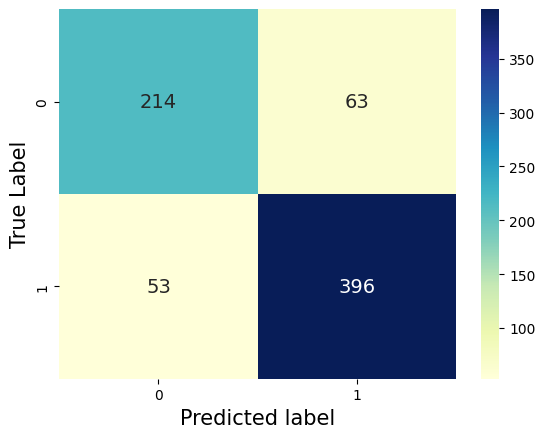

In [ ]:
evaluate(y_pred=y_pred_test, y_true=y_test)

* Evaluasi pada model Decision Tree mendapat nilai
akurasi sebesar 84%.

* Nilai confusion matrix, model ini mendapatkan nilai True Positive sebanyak 396 dan True negative 214. False negative sebanyak 53 dan False Positive 63.

* Model memprediksi 63 data yang seharusnya diprediksi Graduate menjadi Dropout. Model memprediksi 53 data yang seharusnya Dropout menjadi Graduate.

* Melihat confusion matrix, model dikatakan banyak  melakukan kesalahan prediksi.

Lakukan juga pada model Gradient Boosting

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       277
           1       0.89      0.97      0.93       449

    accuracy                           0.90       726
   macro avg       0.92      0.88      0.90       726
weighted avg       0.91      0.90      0.90       726



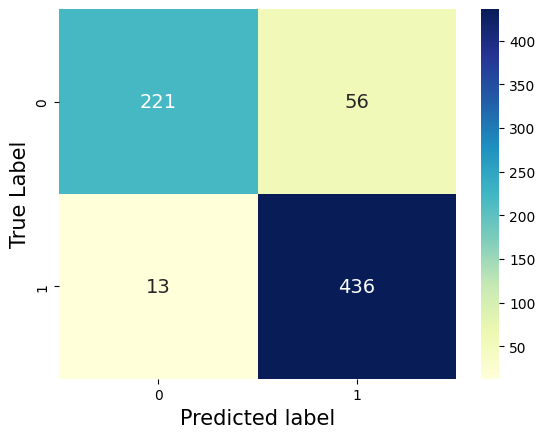

In [ ]:
y_pred_test = gboost_model.predict(new_test_df)

evaluate(y_pred=y_pred_test, y_true=y_test)

* Pada model Gradient Boosting mendapat nilai akurasi
sebesar 90%.
* Confusion Matrix: True Positive sebanyak 436 dan True Negative sebanyak 221. False Positive 56 dan False Negative sebanyak 13.
* Model memprediksi 56 data yang seharusnya Graduate menjadi Dropout, dan model memprediksi 13 data yang seharusnya Dropout menjadi Graduate.
* Dalam hal ini model cukup baik dalam memprediksi kelas Dropout dan kurang baik dalam memprediksi kelas Graduate.

### Feature Important

Feature important dilakukan untuk memahami alasan dibalik setiap prediksi. Untuk mengetahui feature utama tersebut, kita bisa memanfaatkan method feature_importances_ dari sebuah model. Berikut merupakan contoh kode untuk melakukannya.

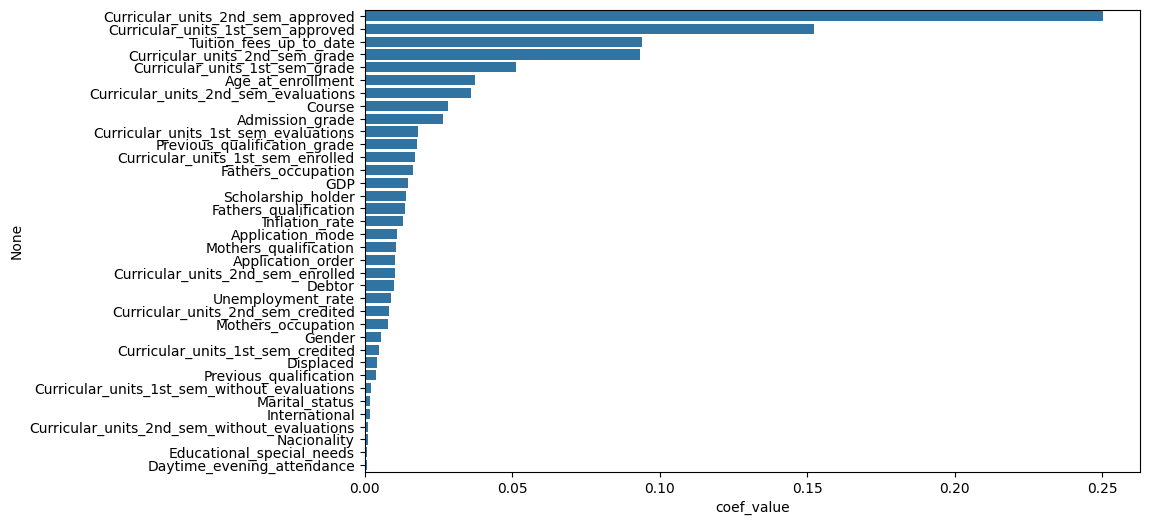

,coef_value
Curricular_units_2nd_sem_approved,0.250094
Curricular_units_1st_sem_approved,0.152413
Tuition_fees_up_to_date,0.094052
Curricular_units_2nd_sem_grade,0.093424
Curricular_units_1st_sem_grade,0.051327
Age_at_enrollment,0.037331
Curricular_units_2nd_sem_evaluations,0.035918
Course,0.028147
Admission_grade,0.026394
Curricular_units_1st_sem_evaluations,0.018238


In [ ]:
def plot_feature_importances(feature_importances, cols):
  features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
  features = features.sort_values(by='coef_value', ascending=False)
  top_features = features

  plt.figure(figsize=(10,6))
  sns.barplot(x='coef_value', y=features.index, data=features)
  plt.show()
  return top_features

plot_feature_importances(gboost_model.feature_importances_, new_train_df.columns)

Berdasarkan grafik tersebut, model sangat dipengaruhi oleh fitur Curricular_units_2nd_sem_approved Curricular_units_1st_sem_approved, dan
Tuition_fees_up_to_date. Hal ini dapat jadi pertimbangan mengapa mahasiswa bisa lulus dan dropout.

Curricular_units_2nd_sem_approved dan Curricular_units_1st_sem_approved adalah jumlah mata kuliah semester 2 dan 1 yang lulus. Kedua fitur ini menjadi indikator untuk performa akademik berdasarkan jumlah mata kuliah yang lulus. Selanjutnya Tuition_fees_up_to_date juga menjadi fitur penting dalam model ini, fitur ini adalah indikator mahasiswa yang bayar kuliah tepat waktu. Fitur ini mencerminkan kedisplinan atau kemampuan finansial mahasiswa.

Faktor akademikadalah penentu umum apakah mahasiswa akan lulus atau dropout, diikut dengan kedisiplinan finansial yang ditandai dengan bayar kuliah tepat waktu. Faktor-faktor sosial dan demografis kurang begitu relevan karena memiliki pengaruh yang relatif kecil terhadap prediksi